In [2]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## Download data
To download the data from Kaggle. You need to have your kaggle token saved in dir `/.kaggle`

In [15]:
!kaggle competitions download -c data-challenge-kernel-methods-2022-2023
!mkdir ../data
!unzip data-challenge-kernel-methods-2022-2023.zip -d ../data
!rm data-challenge-kernel-methods-2022-2023.zip

 83%|███████████████████████████████▌      | 1.00M/1.20M [00:00<00:00, 7.73MB/s]
100%|██████████████████████████████████████| 1.20M/1.20M [00:00<00:00, 8.19MB/s]
mkdir: ../data: File exists
Archive:  data-challenge-kernel-methods-2022-2023.zip
replace ../data/test_data.pkl? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [3]:
with open('../data/training_data.pkl', 'rb') as f:
    train_data = pickle.load(f)

with open('../data/test_data.pkl', 'rb') as f:
    test_data = pickle.load(f)

with open('../data/training_labels.pkl', 'rb') as f:
    train_labels = pickle.load(f)
    

In [4]:
len(train_data), len(test_data), len(train_labels)

(6000, 2000, 6000)

In [50]:
def draw_molecule(G, **kwargs):
    pos = nx.spring_layout(G)
    nx.draw(G,pos=pos, width = [G.edges[e]['labels'][0]+1 for e in G.edges], **kwargs)
    kwargs = {k:v for k,v in kwargs.items() if k in nx.draw_networkx_labels.__code__.co_varnames}
    nx.draw_networkx_labels(G, pos=pos, labels={n:G.nodes[n]['labels'][0] for n in G.nodes}, **kwargs)

def get_atoms(G):
    atoms = [G.nodes[n]['labels'][0] for n in G.nodes]
    return atoms

def get_bonds(G):
    bonds = [G.edges[e]['labels'][0] for e in G.edges]
    return bonds


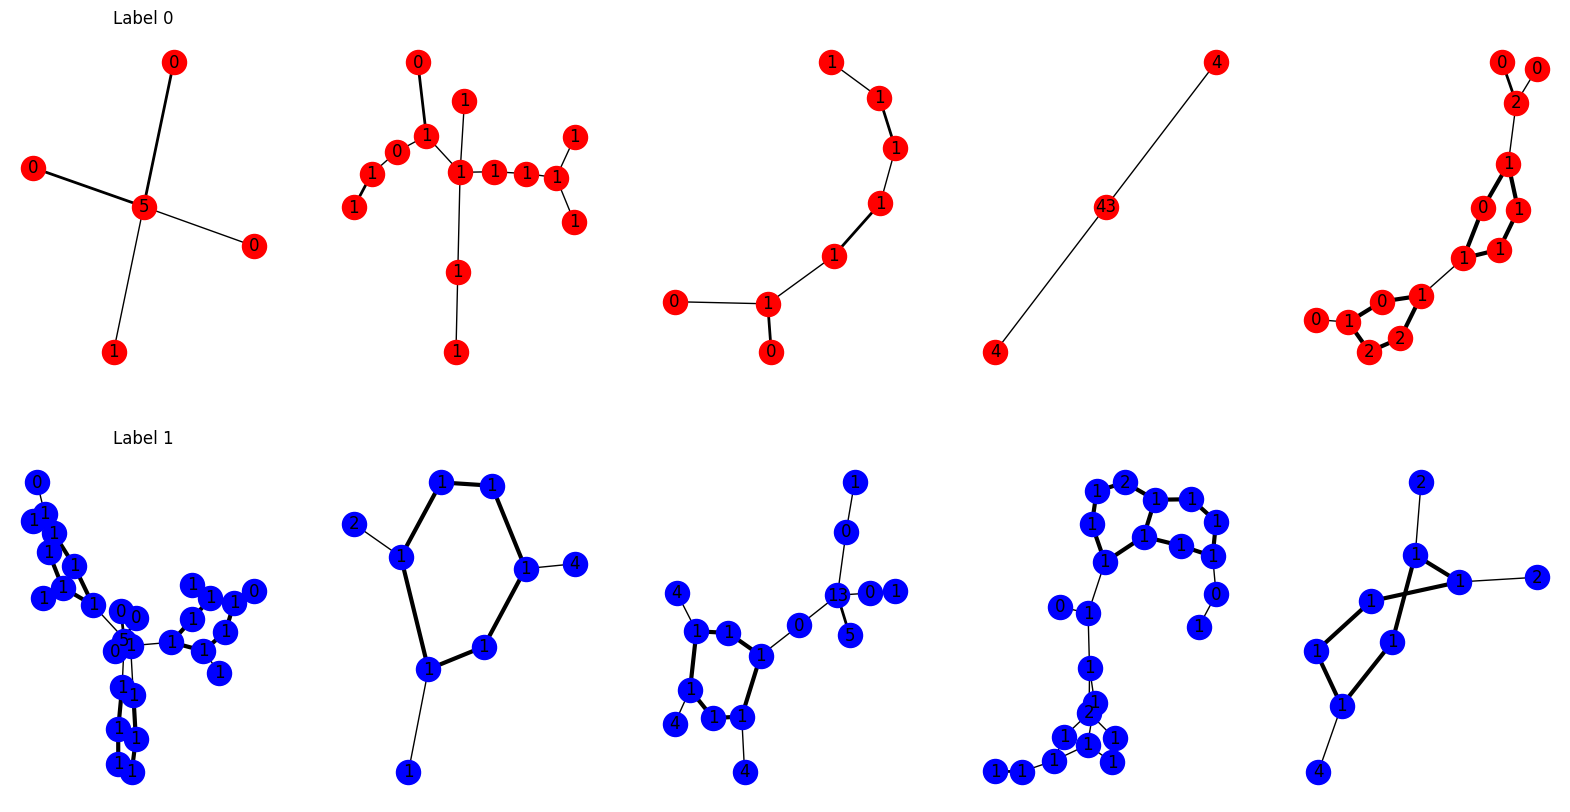

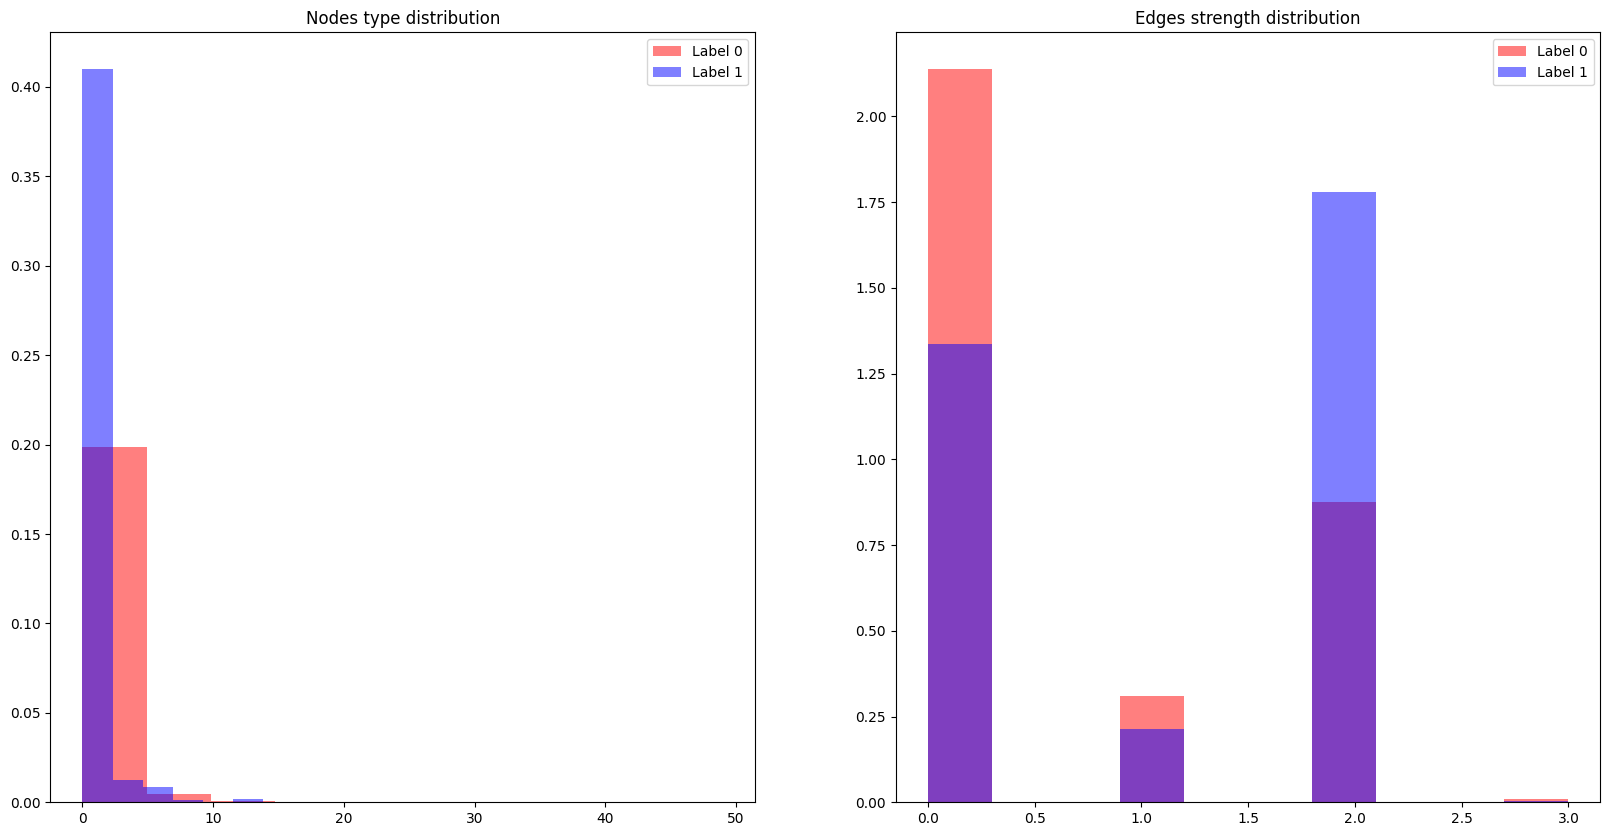

In [55]:
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
idxs_0 = np.where(train_labels == 0)[0]
idxs_1 = np.where(train_labels == 1)[0]
sampled_idxs_0 = np.random.choice(idxs_0, 5)
sampled_idxs_1 = np.random.choice(idxs_1, 5)
for i in range(5):
    G =train_data[sampled_idxs_0[i]]
    draw_molecule(G, ax=axs[0, i], node_color='r')
    G =train_data[sampled_idxs_1[i]]
    draw_molecule(G, ax=axs[1, i], node_color='b')

axs[0, 0].set_title('Label 0')
axs[1, 0].set_title('Label 1')

axs[0, 0].set_ylabel('Sampled graphs')
axs[1, 0].set_ylabel('Sampled graphs')

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

atoms_0 = np.concatenate([get_atoms(G) for G in [train_data[i] for i in np.where(train_labels==0)[0]]])
atoms_1 = np.concatenate([get_atoms(G) for G in [train_data[i] for i in np.where(train_labels==1)[0]]])

axs[0].hist(atoms_0,alpha=0.5, label='Label 0', color='r', density=True)
axs[0].hist(atoms_1,alpha=0.5, label='Label 1', color='b', density=True)

axs[0].set_title('Nodes type distribution')

bonds_0 = np.concatenate([get_bonds(G) for G in [train_data[i] for i in np.where(train_labels==0)[0]]])
bonds_1 = np.concatenate([get_bonds(G) for G in [train_data[i] for i in np.where(train_labels==1)[0]]])

axs[1].hist(bonds_0,alpha=0.5, label='Label 0', color='r', density=True)
axs[1].hist(bonds_1,alpha=0.5, label='Label 1', color='b', density=True)

axs[1].set_title('Edges strength distribution')

axs[0].legend()
axs[1].legend()

plt.show()






In [31]:
G.nodes(data=True)

NodeDataView({0: {'labels': [1]}, 1: {'labels': [1]}, 2: {'labels': [1]}, 3: {'labels': [1]}, 4: {'labels': [1]}, 5: {'labels': [1]}, 6: {'labels': [1]}, 7: {'labels': [1]}, 8: {'labels': [2]}, 9: {'labels': [2]}, 10: {'labels': [1]}, 11: {'labels': [2]}, 12: {'labels': [2]}, 13: {'labels': [1]}, 14: {'labels': [1]}, 15: {'labels': [2]}, 16: {'labels': [2]}, 17: {'labels': [1]}, 18: {'labels': [1]}, 19: {'labels': [1]}, 20: {'labels': [0]}})

{0: Text(-0.6882328006598765, 0.4875767210142319, '1'),
 1: Text(-0.6943215853628499, 0.3500788612830427, '1'),
 2: Text(-0.5673173768219936, 0.2533364859755918, '1'),
 3: Text(-0.3921345763717219, 0.22653995155915918, '1'),
 4: Text(-0.5269358544387603, 0.38358370688873195, '1'),
 5: Text(-0.8019531759437761, 0.6302553350129343, '1'),
 6: Text(-0.004269380436153211, -0.10072969450253946, '1'),
 7: Text(0.206247000705431, -0.11240519073952339, '1'),
 8: Text(0.13400608788065732, 0.04444196824241045, '2'),
 9: Text(-0.170988325279971, 0.08484523805946902, '2'),
 10: Text(-0.011516486684812555, 0.11867427647691955, '1'),
 11: Text(0.02313557805569852, -0.3017935911852045, '2'),
 12: Text(0.2834235194608478, -0.39472337625555437, '2'),
 13: Text(0.11552445831237103, -0.46481563717511004, '1'),
 14: Text(0.4026671724119486, -0.24784779419443212, '1'),
 15: Text(0.07146258244904555, -0.6229692415769904, '2'),
 16: Text(0.6414782545051051, -0.2628822218944684, '2'),
 17: Text(0.8578049192133

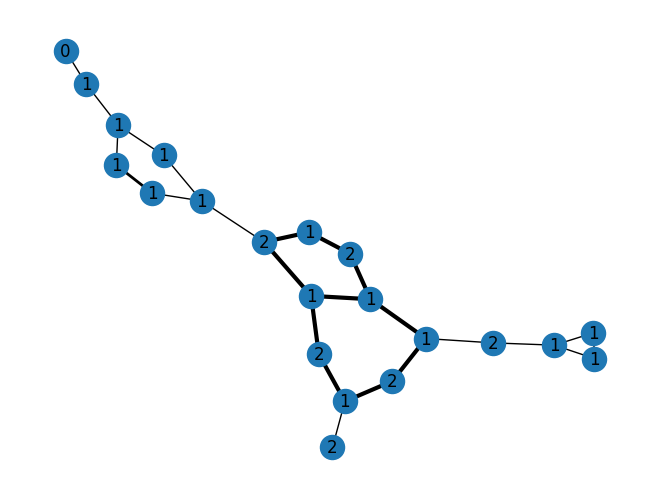

In [36]:
#draw the graph with edge color depending on edge label (edge label is an integer lower than 3. add a color map to see the difference)
#also plot the nodes with a color depending on their label (node label is an integer lower than 3. add a color map to see the difference)

#edge width is proportional to the number of edges between the two nodes
#node size is proportional to the number of nodes

